# <span style="color:blue"> *Version 1* </span>

# Lab#5 - Mobility and Handovers in LTE 

In this lab, we will explore the handover mechanism in LTE networks. We will be focusing on X2 based handover between different eNBs as the UE moves between their coverage areas. We will cover different user equipment (UE) states at the RRC level to observe the status of the handover along with the monitoring of the RSRP, RSRQ, SINR, as well as the Instantaneous Throughput to detect the impact on QoS. Several impacting parameters will be explored to understand the coverage behavior of cells in complex radio environments. 

Following is a short summary of the objectives for this lab: 
- Understand the state flow and signaling associated with a handover 
- Observe the coverage (RSRP, RSRQ, SINR) and traffic (Throughput) metrics during handovers. 
- Study the impact of Bandwidth to the eNBs on the observed throughput for UEs. 
- Study the impact of the network environment on the observed performance metrics for coverage and traffic. 

Relevant chapters in the textbook <a href="#References">[1]</a> are: <b>Sections 4.6.3</b> (pp. 254) and <b>Sections 4.7</b> (pp. 260). 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## <a id='task1'> 1. Introduction </a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Handover is the process by which a mobile device switches from one base station (serving cell) to another while preserving an active conversation or data session. Handovers are an important part of mobile communication networks because they allow mobile devices to travel between cells without losing connectivity.Handover, also known as handoff, is the process by which a mobile device switches from one base station (serving cell) to another while preserving an active conversation or data session. Handovers are an important part of mobile communication networks because they allow mobile devices to travel between cells without losing connectivity.

Handovers in LTE (Long-Term Evolution) networks are accomplished by a number of strategies, including <b>hard</b> handover, <b>soft</b> handover, and <b>hybrid</b> handover. Hard handover is the process of totally disconnecting from the serving cell before connecting to the destination cell. Soft handover, on the other hand, entails keeping connections with both the serving and target cells during the handover procedure, allowing for ongoing communication.Handovers in LTE (Long-Term Evolution) networks are accomplished by a number of strategies, including hard handover, soft handover, and hybrid handover. Hard handover is the process of totally disconnecting from the serving cell before connecting to the destination cell. Soft handover, on the other hand, entails keeping connections with both the serving and target cells during the handover procedure, allowing for ongoing communication.

The hybrid handover procedure begins with a soft handover, and if the signal strength of the destination cell is sufficient, the connection is handed over to the target cell. If the destination cell's signal strength is insufficient, the connection is released and re-established.The hybrid handover procedure begins with a soft handover, and if the signal strength of the destination cell is sufficient, the connection is handed over to the target cell. If the destination cell's signal strength is insufficient, the connection is released and re-established.

Generally, handovers in LTE are divided into two categories: inter-eNodeB (inter-cell) and inter-MME (inter-PLMN). These handovers are carried out using several interfaces, the most common of which being the X2 and S1 interfaces.

The X2 interface is used for inter-eNodeB handovers, which involve the transfer of a mobile device's connection from one eNodeB within the same LTE network to another. The X2 interface allows eNodeBs to exchange handover information such as destination cell identity and signal quality. This information assists the destination eNodeB in preparing for the handover and guarantees that the mobile device's connection transitions smoothly.

The S1 interface is used for inter-MME handovers, which require moving a mobile device's connection between LTE networks or between LTE and other types of networks, such as 3G or 2G networks. The S1 interface enables the source MME (Mobility Management Entity) to transmit information about the handover with the destination MME, such as the identification of the target cell and the context of the mobile device (e.g., user identity, location, and security credentials).

We consider an Intra-MME X2-based handover for this lab, where X2 interface between neighboring eNBs is utilized for the initiation and completion of handover process along with the allocation and recovery of resources for the serving and target eNB. 

### 1.1 Sample Topology Model 

The aim of this lab is to compare multiple scenarios involving the impact of cellular coverage, environment and available resources on the performance of handover. Figure 1 represents an urban environment with buildings. The same topology is also used to represent a rural setting by simply removing the buildings. Points A and B in <a id='fig1'> [Figure. 1](#fig1) </a> represent the path taken by the mobile UE as its traverses between coverage of eNBs. 

  

| | 
|---| 
| 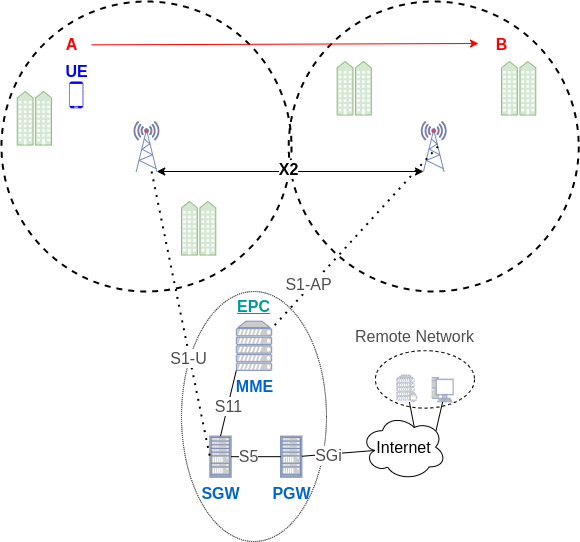 |   

<a id='fig1'><p style="text-align: center;"><b>[Figure. 1: A sample topology for visualizing X2-based handover.](#fig1)</b></p></a> 

 

### 1.2 Cellular Parameters 

In this lab, we will consider a set of parameters for evaluating the performance of the handover process. The designed tasks intend to explore the following parameters and their impact on the performance parameters: 

- <b> Transmit Power of eNBs</b> 
Different values of transmit power will dictate the range or coverage of eNB in any particular direction. In this lab, we will utilize omnidirectional antennas to have uniform coverage in all directions. 

- <b> Cellular Environment Model (Clutter such as buildings) </b> 
We use multi-story buildings designed in the ns-3 simulation environment to enable the utilization of different channel models. These channel models cater for the channel distortions like reflection, scattering, absorption and propagation of radio signals between UE and eNBs.

- <b> Bandwidth and EARFCN Allocation at eNB</b> 
Different levels of bandwidth can be available in different eNBs for utilization by UE services. This has been modeled along with the possibility to allocate different EARFCNs (E-UTRA Absolute Radio Frequency Channel Number) to different eNBs in order to study the impact due to inter-cell interferences during handover process. 
<br> 

### 1.3 Performance Measurement Parameters 

<p style='text-align: justify;'> We will observe 3 parameters to measure the performance of the received signal at the users during the simulation. These are stated below in <a id='table1'>Table. 1</a> along with their respective ranges for reference. </p>  

| Connectivity | RSRP (dBm) | RSRQ (dB) | SINR (dB) | 
|--------------|--------------------|---------------------|-----------| 
| <code style="background:lime;color:black">Excellent</code>    | <code style="background:lime;color:black">>= -80 </code>            | <code style="background:lime;color:black">>= -10 </code>              | <code style="background:lime;color:black">>= 20 </code>     | 
| <code style="background:lightsalmon;color:black">Good</code>          | <code style="background:lightsalmon;color:black">-80 to -90</code>         | <code style="background:lightsalmon;color:black">-10 to -15</code>          | <code style="background:lightsalmon;color:black">13 to 20</code> | 
| <code style="background:coral;color:black">Medium</code>       | <code style="background:coral;color:black">-90 to -100</code>        | <code style="background:coral;color:black">-15 to -20</code>          | <code style="background:coral;color:black">0 to 13</code>   | 
| <code style="background:black;color:white">Weak</code>         | <code style="background:black;color:white"><= -100</code>            | <code style="background:black;color:white">< -20</code>               | <code style="background:black;color:white"><= 0</code>      | 
<p style="text-align: center;"><b><a id='table1'>Table. 1: Reference connectivity state for different ranges. </a></b></p> 

<b>Note:</b> The values for these parameters are negative and mathematically -70dBm is considered better than -80dBm.<br> 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <a id='task1'> 2. Analyzing Mobility and Handovers in LTE </a> 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
This section introduces the process and mechanics of handover (HO) in LTE. A UE reports certain measurements for RSRP, RSRQ and SINR in the form of periodic measurement reports to the serving eNB. These reports also include prospective neighbor cells with pre-existing neighbor relations with the serving eNB. There are observable events A1, A2, A3, A4, and A5 described in <a id='table2'>Table. 2</a> and shown in <a id='fig2'> [Figure. 2](#fig2) </a>. These measurement reports from the UE generated for the eNB include two values: one for the serving cell and the other for the neighboring cells. The eNB utilizes the available handover algorithms to assess the events A1-A5 to decide the necessity of the handover.  

| Event | Description| 
|--------------|--------------------| 
| **A1**   | Serving cell becomes better than a defined threshold | 
| **A2**   | Serving cell becomes worse than a defined threshold | 
| **A3**   | Neighbor cell becomes better than serving cell by an offset factor (<b>hysteresis</b>) | 
| **A4**   | Neighbor cell becomes better than a defined threshold | 
| **A5**   | Serving cell becomes worse than threshold1 and neighbor cell becomes better than threshold2 | 

<p style="text-align: center;"><b><a id='table2'>Table. 2: Handover events in LTE. </a> (Source <a href="#References">[2]</a> )</b></p> 

The relationship between these so measurement events segregates different decision-making moments before, during and after the HO process in LTE. Events A2, A4 and A3 are utilized mainly for the HO based on the actual algorithm implementation. We will consider A2 and A4 events in order to perform finely tuned and best performing HOs. 
 
| | 
|---| 
|![lab5-ho-mechanics2.png](Figures/lab5-ho-mechanics2.png)|   

<a id='fig2'><p style="text-align: center;"><b>[Figure. 2a: Events A1-A5 for a 2-cell scenario. (RSRQ vs Time)](#fig2) (Source <a href="#References">[3]</a> )</b></p></a> 
    
### 2.1 Initiation of Handovers in LTE
Hysteresis and time-to-trigger (TTT) are two critical characteristics in LTE (Long-Term Evolution) handovers that help to improve network performance and eliminate needless handovers.

#### 2.1.1 Hysteresis
Hysteresis is a threshold concerning A3 event that establishes the difference in signal intensity between the serving and target cells prior to initiating a handover. It is used to avoid unwanted handovers by requiring a particular amount of signal strength differential before starting a HO. This threshold is used to prevent the mobile device from moving between cells owing to slight signal strength variations. Hysteresis requires a particular threshold of difference in signal intensity before initiating a HO, reducing the incidence of needless handovers.
    
| | 
|---| 
|![lab5-ho-hyst-offset.png](Figures/lab5-ho-hyst-offset.png)|   

<a id='fig2'><p style="text-align: center;"><b>[Figure. 2b: Hysteresis and TTT in Handovers. (RSRQ vs Time)](#fig2) (Source <a href="#References">[4]</a> )</b></p></a>
#### 2.1.2 Time-to-Trigger (TTT)
It is the period between when a mobile device detects a stronger signal from a destination cell and when the device initiates a handover to the target cell. The time to trigger is commonly measured in milliseconds (ms) and is used to ensure that handovers are begun as soon as possible but not too soon.The "time to trigger" is the period between when a mobile device detects a stronger signal from a destination cell and when the device initiates a handover to the target cell. The time to trigger is commonly measured in milliseconds (ms) and is used to ensure that handovers are begun as soon as possible but not too soon.


In conclusion, hysteresis and TTT are two critical handover characteristics utilized in LTE to eliminate needless handovers, increase network performance, and lengthen the battery life of mobile devices. We utilize the <u>following values for hysteresis and TTT</u> in this lab:

- <b>Hysteresis = 2dB</b>
- <b>Time-to-Trigger = 16ms</b>

## 3. <a id='task1'> <span style="color:red"> *Task#1: Assessing the need for a HO* </span></a> 
This task introduces the format of the lab and the topology design tools utilized during this lab like previous labs of TTM4133. In this task, we will observe the performance of a mobile user along a pre-defined path across a 2-cell scenario. The observations are made in 2 steps: firstly, by disabling the **X2** interface in order to disable HOs effectively, and, secondly by enabling **X2** interface to allow normal HO operation.  

We will start by creating a simple 2-cell radio access network (RAN) topology using the React application. 

### 3.1 Designing a RAN topology 
The topology design follows the same basic steps from lab0 starting from accessing the react app, designing and saving the topology. Kindly utilize the blueprint provided in <a id='fig3'> [Figure. 3](#fig3)</a> to design the topology where the actual location of eNB and UEs is not important if the users are inside the coverage area of eNB. The <b>eNB transmit power</b> must be chosen as <b> 40dBm</b> for this task.    
  
| | 
|---| 
|![lab5-task1-top.png](Figures/lab5-task1-top.png) |   
<a id='fig3'><p style="text-align: center;"><b> Figure. 3: A simple mobility example.</b></p></a> 
 
> <b>Adding Mobile UE</b>: To add a mobile UE, follow the steps as shown below: 
> - Click on 'Add mobile UE path' to place the UE 
> - Click on 'Add mobile UE path' to get the starting point of the mobile UE path labeled <b><span>&#9312;</span></b>. 
> - Click on 'Add mobile UE path' to get the next point of the mobile UE path labeled <b><span>&#9313;</span></b>. (and so on) 

### 3.2 Simulate the designed topology in ns-3 
The python code in <b>lab5-init.py</b> is provided to convert the design topology in a form acceptable to the SEM and ns-3 simulation engines. Moreover, some relevant command line arguments are also passed to the ns-3 program implementing the given topology in order to observe the results and status of the simulation.  These parameters include the information extracted from the topology in <a id='fig3'> [Figure. 3](#fig3)</a> about location, transmit power from the react interface as well as the selection parameters for collecting different performance parameters like (RSRP, RSRQ, etc.) and/or connection setup logs. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate. 
<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files) 
- <b>enable handover = yes or no</b>  <-- Select no
- show topology (yes or no) 

In [ ]:
%run -i 'Modules/lab5-init.py'

### 3.3 Pre-processing simulation results 
The python code in <b>lab5-DataPre.py</b> is provided to process and clean the obtained data from ns-3 simulations. The following set of variables provides the state of the collected data from the ns-3 simulations. 

<ul> 
    <li><b>Before</b> data cleaning and formatting</li> 
    <ul> 
      <li>result_signalpower (for RSRP, RSRQ results) </li> 
      <li>result_sinr (for SINR results) </li> 
      <li>result_throughput (for SINR results) </li> 
    </ul> 
  </li> 
</ul> 

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

In [ ]:
# to visualize the contents of the metric variables
display(res_signalpower)
display(res_sinr)
display(res_throughput)

The results will be available in the following variables for further processing after completion of a ns-3 simulation, 
- **result_signalpower** provides information regarding received signal power and signal quality for cellular users. 
- **result_sinr** provides information regarding received signal power and interference experienced by the cellular users. 
- **result_throughput** provides information regarding averaged user throughput in downlink and uplink for cellular users.

In addition, we also have the variables named <b>campaign</b> and <b>campaign1</b>which are from the `lab5-init.py` containing the simulation objects for the ns-3 simulations. We use them here to obtain the results using the simulation objects. 

> Note: Users are identified in the simulations by their unique <b>RNTI</b> values in the current serving cell. For example, a user ID of <u>user21</u> identifies that the user has an RNTI of <u>1</u> and is connected to the cell with id <u>2</u>. Moreover, these values are subject to change in different simulation runs.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='task1'> <span style="color:purple"> <b>Important:</b> </span></a>
The users connected to a cell ID = 1 will have the format user1x where x stands for different RNTIs but the cell ID is fixed for the cell. The following examples identify some of the observed user ID values:

<u><b>user11 and user12</u></b> show that there are 2 users with RNTI = 1 and 2 connected to cell ID = 1.

<u><b>user11 and user21</u></b> show that there is 1 user with RNTI = 1 and that there are two cells with cell ID = 1 and 2. (This is the most observable one in this lab)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.4 Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this from the extracted variables.

In [ ]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))

plt.show()

sns.reset_orig()


### 3.5 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the cell. The impact on the static UE is negligible in the simulated LTE network. However, there are key points to be observed regarding the behavior of the static and mobile UE. These aspects are covered by the following exercises: 

### <u>Exercises</u>

#### Q3.5.1a: Explain the observed values of RSRP\RSRQ and SINR for the mobile UE? Do the values correlate to the experienced throughput from mobile UE?

<b><u>Answer:</u></b>



#### Q3.5.1b: Is there something unexpected in the observed values for RSRP\RSRQ and SINR? Identify the problem if it exists?

<b><u>Answer:</u></b>



#### Q3.5.2a: What type of channel characteristics and impairments causes the observed values of signal power, signal quality and SINR for the static user? 

<b><u>Answer:</u></b>



#### Q3.5.2b: What type of channel characteristics and impairmentsand impairments causes the observed values of signal power, signal quality and SINR for the mobile user? 

<b><u>Answer:</u></b>



#### Q3.5.3: What causes the variations in the observed throughput values for the mobile user as it moves through the eNB's coverage?  <br> Name the process in the physical layer that dictates the levels of observed throughput. 
> Hint: The allocation of digital modulation schemes is related to this determination of throughput levels for users. 

<b><u>Answer:</u></b>



---
---
### <span style="color:green"> Milestone 1 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 4. <a id='task1'> <span style="color:red"> *Task#2: Performance Assurance using Handovers* </span></a>
In this task, we will add an additional eNB to the topology utilized in <b> <a id='task1'>Task 1</a></b>. This ensures that the mobile UE has probability to switch over to a new eNB after it leaves the first eNB. In addition, this additional eNB provides us with an opportunity to study the mechanics of the handover process in a multi-cellular environment. Only 2 neighboring eNBs are normally required to perform X2-based handovers and the process is extendable to any number of pre-existing neighboring cells. 

In this task, we will observe the performance of a mobile user along a pre-defined path across a 2-cell scenario. The observations are made in 2 steps: firstly, by disabling the **X2** interface in order to disable 
X2-based HOs effectively, and, secondly by enabling **X2** interface to allow normal X2-based HO. 


### <a id='scenario1'> <span style="color:blue"> *Scenario 1: Handover disabled (No X2 interface between eNBs)* </span></a>
We will start by creating a simple 2-cell radio access network (RAN) topology using the React application as show in <a id='fig4'>[Figure. 4](#fig4).
 

| |
|---|
|![lab5-task2-top.png](Figures/lab5-task2-top.png) |  
<a id='fig4'><p style="text-align: center;"><b>[Figure. 4: A multicellular mobility example.](#fig4)</b></p></a>We will start by creating a simple 2-cell radio access network (RAN) topology using the React application as show in <a id='fig4'>[Figure. 4](#fig4).


### 4.1 Simulate the designed topology in ns-3
Use the <b>lab5-init.py</b> and the <a id='fig4'>[Figure. 4](#fig4)</a> to design the topology using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- enable handover = <b>no</b>
- show topology (yes or no)
 

In [ ]:
%run -i 'Modules/lab5-init.py'

### 4.2 Pre-processing simulation results
The python code in <b>lab5-DataPre.py</b> is provided to process and clean the obtained data from ns-3 simulations. The following set of variables provides the state of the collected data from the ns-3 simulations.

<ul>
    <li><b>Before</b> data cleaning and formatting</li>
    <ul>
      <li>result_signalpower (for RSRP, RSRQ results)</li>
      <li>result_sinr (for SINR results)</li>
      <li>result_throughput (for SINR results)</li>
    </ul>
  </li>
</ul>

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

The following set of variables provides the state of the collected data from the ns-3 simulations.

<ul>
  <li><b>After</b> data cleaning and formatting
    <ul>
      <li>res_signalpower (for RSRP, RSRQ results)</li>
      <li>res_sinr (for SINR results)</li>
      <li>res_throughput (for SINR results)</li>
    </ul>
  </li>
</ul>

**Note:** Simply use <em>display(variable_name)</em> to view different available performance metrics.



In [ ]:
# to visualize the contents of the metric variables
# display(result_sinr)
# display(res_sinr)

### 4.3 Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this from the extracted variables.

In [ ]:
# for the plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 4.4 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell in absence of X2 interface. Keep in mind that other types of handovers are possible even if X2 link is not available. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q4.4.1: What type of handover can be conducted in the absence of X2 connection between two eNB’s? Is the specified type of handover happening in the simulations?
> Hint: The handover can still be done using EPC...

<b><u>Answer:</u></b>




#### Q4.4.2: What issues can occur with non-X2 based handover specified in Q3.4.1?

<b><u>Answer:</u></b>



#### Q4.4.3: What may the consequences be if the values of time-to-trigger and hysteris are set too low or too high? Discuss the consequences of all 4 conditions?

<b><u>Answer:</u></b> 


#### Q4.4.4: Which measurement events from <a id='fig2'> [Figure. 2](#fig2) </a> are observed in the simulation results? 
> Hint: Check RSRP\RSRQ graphs for observing these events. 

<b><u>Answer:</u></b>



### <a id='scenario2'> <span style="color:blue"> *Scenario 2: Handover enabled (X2 interface exists between eNBs)* </span></a>

This scenario covers the handover simulation for <a id='fig5'>[Figure. 5](#fig5)</a> using the designed topology in <b> <a id='scenario1'>Scenario 1</a></b> with X2 interface enabled. 

 

| |
|---|
|![lab5-task2-top.png](Figures/lab5-task2-top.png) |  
<a id='fig5'><p style="text-align: center;"><b>[Figure. 5: A multicellular mobility example.](#fig5)</b></p></a>



The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- enable handover = <b>yes</b>
- show topology (yes or no)

In [ ]:
%run -i 'Modules/lab5-init.py'

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

In [ ]:
# to visualize the contents of the metric variables
# display(res_signalpower)
# display(res_sinr)
# display(res_throughput.tail(20))

In [ ]:
# for the plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 4.5 Results
The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell in presence of X2 interface. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q4.5.1: Compare the difference in disruption of traffic between these results and the results obtained obtained in the previous scenario, without the X2 handover. How much disruption is there now? Are there multiple causes of service degradation in the designed topology? Is there any degradation due to the handover itself?

<b><u>Answer:</u></b>



#### Q4.5.2a: What are possible causes that users may experience a disruption of service in scenarios where an handover should have been performed?

<b><u>Answer:</u></b>



#### Q4.5.2b: In general, in which case the probability of service disruption will be high (<b>hard</b> or <b>soft</b> handover)? Which type of handover is most susceptible to service disruption?

<b><u>Answer:</u></b>


#### Q4.5.3: How are the S1 and X2 based handovers different from each other?

<b><u>Answer:</u></b>



#### Q4.5.4: Find the time instance when A3 is triggered in <b><a id='scenario1'>Scenario 1</a></b> and <b><a id='scenario2'>Scenario 2</a></b>? Also specify the observed values at A3 event for RSRP, RSRQ and SINR for the serving and neighbor cells?
> Hint: Consider the hysteresis = 0 and check the RSRQ plot to determine the time instances.

<b><u>Answer:</u></b>



---
---
### <span style="color:green"> Milestone 2 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 5. <span style="color:red"> *Task#3: Impact of Channel and Clutter (Buildings etc.) on Handovers* </span>
This task deals with studying the impact of changing channel properties via the introduction of buildings in the radio environment. This change will lead to enhancement in effects of phenomenon including but not limited to signal reflection, absorption, scattering and loss due to the buildings. This also produces multi-path effects in the channel due to which signal takes multiple paths to reach the UE. The simulations cover two scenarios where a simple radio environment consisting of 2 eNBs and a mobile is considered in the absence and presence of buildings. 

Consequently, the communication path between UE and eNB will be either line-of-sight (LOS), non-line-of-sight (NLOS) or a hybrid combination of both modes. 

### <span style="color:blue"> *Scenario 1: Simulation without any buildings* </span>
The topology to be designed for this scenario is shown as follows:

| |
|---|
|![lab5-nobuildtask3-top.png](Figures/lab5-nobuildtask3-top.png) |  
<a id='fig6'><p style="text-align: center;"><b>[Figure. 6: A simple topology for HO without buildings.](#fig6)</b></p></a>


### 5.1 Simulate the designed topology in ns-3
Use the <b>lab5-init.py</b> and the <a id='fig6'>[Figure. 6](#fig6)</a> to design the topology using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b>enable handover = yes</b>
- show topology (yes or no)

In [ ]:
%run -i 'Modules/lab5-init.py'

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

In [ ]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### <span style="color:blue"> *Scenario 2: Simulation with 2 buildings* </span>
Design the topology shown in <a id='fig7'>[Figure. 7](#fig7)</a> using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

| |
|---|
|![lab5-task3build-top.png](Figures/lab5-task3build-top.png) |  
<a id='fig7'><p style="text-align: center;"><b>[Figure. 7: A simple building topology for HO.](#fig7)</b></p></a>


### 5.2 Simulate the designed topology in ns-3
The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b> enable handover = yes </b>
- show topology (yes or no)

In [ ]:
%run -i 'Modules/lab5-init.py'

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

In [ ]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 5.3 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell as channel model changes due to clutter differences in the coverage area. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q5.3.1: How can you identify that the UE is hidden behind a building from the plots? What type of behavior do you expect from the measurements? 
> Hint: Compare both the cases with and without building to see if there are unexpected dips in throughput even though user is close to the eNB.
> To check: Try changing the location of buildings to see if it has an impact. 

<b><u>Answer:</u></b>



#### Q5.3.2: What parameters can be adjusted to optimize the handover performance in a scenario where there are lot of buildings and obstacles? How should they be adjusted?
> Note: By optimization, it is meant that only necessary handovers are performed, and unnecessary handovers are avoided. 

<b><u>Answer:</u></b>



#### Q5.3.3: What impact can buildings have on signal propagation? How can this be observed in the throughput results?
> Hint: Important to consider the many short variations and more than coverage between the buildings.

<b><u>Answer:</u></b> 




---
---
### <span style="color:green"> Milestone 3 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 6. <span style="color:red"> *Task#4: Impact of Carrier Frequency and Bandwidth* </span>
This task covers the concepts of differentiation in bandwidth and center frequencies for different eNBs. This is achieved by creating a 2 cell topology and allocation of carrier bandwidths to each eNB. The impact of this allocation will be observable through the measured UE throughput for different users in the coverage area of both eNBs.  This task consists of 2 scenarios for comparing the usage of similar and different carrier frequency and bandwidth.

### 6.1 Carrier frequency and Bandwidth in LTE
In this task, we utilize different LTE bands for the two eNBs in the topology along with different allocation of bandwidth values selected from the the <b>Table 5.7.3-1</b> <a href="#References">[5]</a>. The carrier frequency bands chosen for eNBs are 1 and 2 from the specified table which implicates the following frequency bands for the downlink and uplink channels:

#### <u>Band 1 Values</u>
- Downlink Carrier Frequency: 2120
- Uplink Carrier Frequency: 1930

#### <u>Band 2 Values</u>
- Downlink Carrier Frequency: 1950
- Uplink Carrier Frequency: 1870

These values are selected inside the ns-3 script so there is no need to configure them here.

### <a id='t4-scenario1'> <span style="color:blue"> *Scenario 1: Same Carrier frequency and Bandwidth* </span></a>
The topology shown in <a id='fig8'>[Figure. 8](#fig8)</a> consists of a mobile UE moving between coverage regions of both eNB.
| |
|---|
|![lab5-task4-top.png](Figures/lab5-task4-top.png) |  
<a id='fig8'><p style="text-align: center;"><b>[Figure. 8: A multicellular mobility and HO scenario.](#fig8)</b></p></a>

### 6.2 Use a different python script
The python code in <b>lab5-init-bw.py</b> uses a different set of command line arguments to provide the necessary information regarding carrier frequency and bandwidth to the LTE network topology to be designed in ns-3. The parameters required are listed as follows along with their recommended values: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b> bandwidth for eNB1</b> (10)
- <b> bandwidth for eNB2</b> (3)
- <b> enable different center frequencies</b> (no)
- show topology (yes or no)
 

In [ ]:
%run -i 'Modules/lab5-init-bw.py'

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

In [ ]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 6.3 Results

The results provide the observed values for RSRP, RSRQ, SINR and measured throughput for the mobile user as it traverses two eNBs with similar available resources (bandwidth). The results should be analyzed in the light of the following exercises:

### <u>Exercises</u>

#### Q6.3.1: What impact does the difference in bandiwdth between eNBs has on the observed throughput for different values of bandwidth? 

<b><u>Answer:</u></b>



#### Q6.3.2: Why is using different center frequencies important in cellular networks across different cells? 

<b><u>Answer:</u></b>



### <a id='t4-scenario2'> <span style="color:blue"> *Scenario 2: Different Carrier frequency and Bandwidth* </span></a>
### 6.4 Use a different python script
The python code in <b>lab5-init-bw.py</b> uses a different set of command line arguments to provide the necessary information regarding carrier frequency and bandwidth to the LTE network topology to be designed in ns-3. The parameters required are listed as follows along with their recommended values: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b>bandwidth for eNB1</b> (10)
- <b>bandwidth for eNB2</b> (3)
- <b>enable different center frequencies</b> (yes)
- show topology (yes or no)

In [ ]:
%run -i 'Modules/lab5-init-bw.py'

In [ ]:
%run -i 'Modules/lab5-dataPre.py'

In [ ]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 6.5 Results

The results provide the observed values for RSRP, RSRQ, SINR and measured throughput for the mobile user as it traverses two eNBs with differing available resources (bandwidth). The results should be analyzed in the light of the following exercises:

### <u>Exercises</u>

#### Q6.5.1: What is the difference in the observed throughput for the mobile user when using same and difference center frequencies in the eNBs?

<b><u>Answer:</u></b>




#### Q6.5.2: What type of handover takes place in Scenarios 1 and 2?
> Hint: Choose from Soft or Hard handover types. Also specify X2 or S1 type of handover in both scenarios.

<b><u>Answer:</u></b>


#### Q6.5.3: What causes the difference in handover times in Scenarios 1 and 2?
> Hint: Keep in mind the mechanics of the handover process.

<b><u>Answer:</u></b>



#### Q6.5.4: How does the observed values of RSRP\RSRQ and SINR be explained for both scenarios when using similar and different frequencies? 

<b><u>Answer:</u></b>



---
---
### <span style="color:green"> Milestone 4 </span>

At the end, **call a TA** to make sure everything went as expected.

---
---

# References

[1] "From GSM to LTE-Advanced Pro and 5G, An introduction to Mobile Networks and Mobile Broadband", Martin Sauter, 4th Edition, 2021

[2] "Evolved Universal Terrestrial Radio Access (E-UTRA); Radio Resource Control (RRC); Protocol specification", 3GPP. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2440 (Accessed: 15-02-2023)

[3] "Handover Event LTE", 4G/LTE-Measurement. Online: https://www.thinkcorpindonesia.com/handover-event-lte/https://www.thinkcorpindonesia.com/handover-event-lte/ (Accessed : 16-02-2023)

[4] Marwat, S.N.K., Meyer, S., Weerawardane, T. and Goerg, C. (2014), Congestion-Aware Handover in LTE Systems for Load Balancing in Transport Network. ETRI Journal, 36: 761-771. https://doi.org/10.4218/etrij.14.0113.1034Marwat, S.N.K., Meyer, S., Weerawardane, T. and Goerg, C. (2014), Congestion-Aware Handover in LTE Systems for Load Balancing in Transport Network. ETRI Journal, 36: 761-771. https://doi.org/10.4218/etrij.14.0113.1034

[5] "Evolved Universal Terrestrial Radio Access (E-UTRA); User Equipment (UE) radio transmission and reception", 3GPP. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2411 (Accessed: 15-03-2023)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------